In [1]:
import os
import pandas as pd
from IPython.lib.display import Audio
import soundfile as sf
import re

In [2]:
def sanitize_path_name(name):
    # Replace / and \ with -
    name = re.sub(r'[\\/]', '-', name)
    # Remove any other special characters not suitable for file names
    name = re.sub(r'[<>:"|?*]', '', name)
    # Replace spaces with underscores for better readability (optional)
    name = name.replace(' ', '_')
    return name

In [3]:
parquet_directory = 'GLOBE\data'
output_dir = 'GLOBE\wavfiles'

In [4]:
os.makedirs(output_dir, exist_ok=True)

In [6]:
for parquet_file in os.listdir(parquet_directory):
    if parquet_file.endswith('.parquet'):
        parquet_path = os.path.join(parquet_directory, parquet_file)
        
        # Read the parquet file into a DataFrame
        try:
            df = pd.read_parquet(parquet_path)
        except Exception as e:
            print(f"Error reading {parquet_file}: {e}")
            continue
        
        # Process each row in the DataFrame
        for index, row in df.iterrows():
            # Extract audio bytes
            audio_bytes = row['audio']['bytes']
            
            # Define and sanitize the accent path
            accent = sanitize_path_name(row['accent'])
            accent_dir = os.path.join(output_dir, accent)
            os.makedirs(accent_dir, exist_ok=True)
            
            # Define the output file path
            output_file_path = os.path.join(accent_dir, f"audio_{parquet_file.replace('.parquet', '')}_{index}.wav")
            
            # Create Audio object and save as .wav file
            try:
                audio = Audio(audio_bytes)
                with open(output_file_path, 'wb') as file:
                    file.write(audio.data)
                print(f"Audio saved to {output_file_path}")
            except Exception as e:
                print(f"Error processing audio for file {parquet_file} row {index}: {e}")

print("Processing complete.")

e:\Accent-Dataset\.venv\lib\site-packages\pydub\utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [2]:
base_directory='GLOBE\wavfiles'

In [3]:
accent_counts = {}

# Iterate through each folder in the base directory
for accent_folder in os.listdir(base_directory):
    accent_path = os.path.join(base_directory, accent_folder)
    
    # Check if it is a directory
    if os.path.isdir(accent_path):
        # Get the list of .wav files in the folder
        wav_files = [file for file in os.listdir(accent_path) if file.endswith('.wav')]
        
        # Count the number of .wav files
        num_files = len(wav_files)
        
        # Store the count in the dictionary
        accent_counts[accent_folder] = num_files

# Print the dictionary
print(accent_counts)

{'Academic_southern_English,England_English': 497, 'Afrikaans_English': 2, 'American_South_East_Georgia_Dialect': 10, 'Australian_English': 18437, 'Australian_English,Educated_Australian_Accent': 12, 'Australian_English,England_English': 53, 'Australian_English,England_English,Japanese': 19, 'Australian_English,Sydney_-_middle_eastern_seaboard_Australian': 13, 'Austrian': 101, 'A_Savage_Texas_Gentleman_': 20, 'bangladesh,India_and_South_Asia_(India,_Pakistan,_Sri_Lanka)': 12, 'Bangladeshi,Bangladesh_English': 2, 'Bangladeshi_English': 2, 'Brazillian_Accent': 2, 'British': 15, 'British_accent': 35, 'Bulgarian': 2, 'California': 12, 'Canadian_English': 39520, 'Canadian_English,Irish_English': 22, 'Canadian_English,United_States_English': 27, 'Canadian_English,United_States_English,England_English': 17, 'Dutch': 2, 'Dutch_English': 48, 'East_African_Khoja': 14, 'East_Indian': 3, 'england,london,academic': 14, 'England_English': 93295, 'England_English,British': 12, 'England_English,Canadi

In [4]:
files=0

for x in accent_counts.values():
    files=files+x

print(files)

572159


In [15]:
import matplotlib.pyplot as plt

TypeError: unhashable type: 'dict'

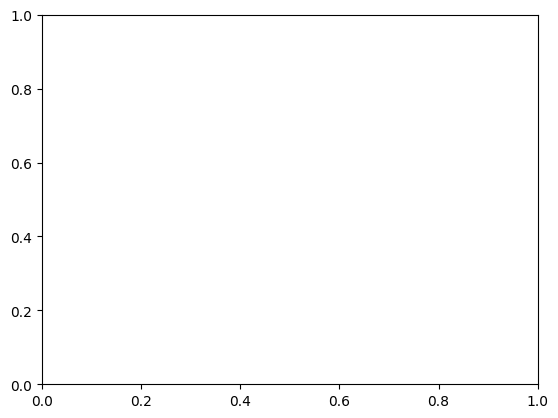

In [17]:
plt.bar(accent_counts,height=accent_counts.values(),width=accent_counts.keys)
plt.show()

In [13]:
accent_names=list((accent_counts.keys()))
accent_names

['Academic_southern_English,England_English',
 'Afrikaans_English',
 'American_South_East_Georgia_Dialect',
 'Australian_English',
 'Australian_English,Educated_Australian_Accent',
 'Australian_English,England_English',
 'Australian_English,England_English,Japanese',
 'Australian_English,Sydney_-_middle_eastern_seaboard_Australian',
 'Austrian',
 'A_Savage_Texas_Gentleman_',
 'bangladesh,India_and_South_Asia_(India,_Pakistan,_Sri_Lanka)',
 'Bangladeshi,Bangladesh_English',
 'Bangladeshi_English',
 'Brazillian_Accent',
 'British',
 'British_accent',
 'Bulgarian',
 'California',
 'Canadian_English',
 'Canadian_English,Irish_English',
 'Canadian_English,United_States_English',
 'Canadian_English,United_States_English,England_English',
 'Dutch',
 'Dutch_English',
 'East_African_Khoja',
 'East_Indian',
 'england,london,academic',
 'England_English',
 'England_English,British',
 'England_English,Canadian_English',
 'England_English,East_Anglian_English',
 'England_English,Educated,non_region

In [19]:
accent_value=list((accent_counts.values()))
accent_value

[497,
 2,
 10,
 18437,
 12,
 53,
 19,
 13,
 101,
 20,
 12,
 2,
 2,
 2,
 15,
 35,
 2,
 12,
 39520,
 22,
 27,
 17,
 2,
 48,
 14,
 3,
 14,
 93295,
 12,
 223,
 17,
 17,
 12,
 2869,
 105,
 23,
 14,
 12,
 107,
 18,
 12,
 89,
 10,
 131,
 17,
 15,
 22,
 48,
 15,
 2686,
 12,
 15,
 2,
 2,
 2,
 17,
 29,
 35,
 14,
 20,
 7957,
 980,
 2,
 10510,
 15,
 17,
 12,
 15,
 115,
 12,
 45,
 2192,
 2,
 2,
 2,
 14,
 2,
 12,
 2,
 5,
 2,
 149,
 2,
 17,
 2,
 12,
 16,
 442,
 14,
 13,
 12,
 12,
 14,
 12,
 25,
 36,
 15,
 13,
 2,
 2036,
 15,
 105,
 2,
 21,
 27,
 11859,
 14,
 16,
 233,
 4,
 158,
 11,
 2,
 2,
 2,
 2419,
 12,
 226,
 16,
 2,
 52,
 2,
 6,
 1135,
 12,
 2,
 12,
 14,
 25,
 2,
 2,
 3,
 2,
 12,
 12,
 22,
 2,
 369122,
 12,
 17,
 78,
 19,
 14,
 12,
 12,
 51,
 12,
 215,
 16,
 39,
 12,
 12,
 14,
 29,
 57,
 136,
 454,
 69,
 62,
 12,
 12,
 17,
 14,
 12,
 14,
 15,
 13,
 12,
 28,
 585,
 12,
 12,
 21,
 32,
 334,
 317,
 167,
 12,
 2]

TypeError: unhashable type: 'dict'

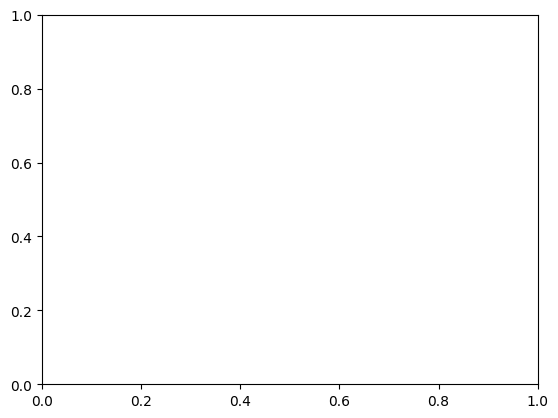

In [20]:
plt.bar(accent_counts,height=accent_value,width=accent_names)
plt.show()

In [14]:
accentFeq=pd.DataFrame(accent_counts,columns=accent_names)
accentFeq

ValueError: If using all scalar values, you must pass an index

In [16]:
audio_bytes = df['audio'][0]['bytes']

In [17]:
output_file_path = 'output_audio.wav'

In [18]:
audio = Audio(audio_bytes)

In [19]:
audio_data = audio.data

In [20]:
# Save the raw bytes to a .wav file
with open(output_file_path, 'wb') as file:
    file.write(audio_data)

print(f"Audio saved to {output_file_path}")

Audio saved to output_audio.wav
